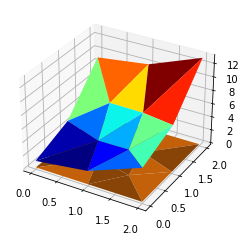

In [7]:
"""
FEniCS Poisson equation demo program with Dirichlet conditions.

-Laplace(u) = f in unit square
u = u_D on the Boundary
u_D = 1 + x^2 + 2y^2
  f = -6        
"""

from fenics import *
import matplotlib.pyplot as plt
import meshio

# Create mesh and function space
mesh = Mesh('./Square_mesh_files/Square.xml')
V = FunctionSpace(mesh, 'P', 1)

# Boundary condition
u_D = Expression('1+pow(x[0],2)+2*pow(x[1],2)', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u),grad(v))*dx
L = f*v*dx

# Solve problem
u = Function(V)
solve(a == L, u, bc)

# Plot problem
plot(u)
plot(mesh)

# Hold plot
plt.show()